In [67]:
import numpy as np
from scipy import stats
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

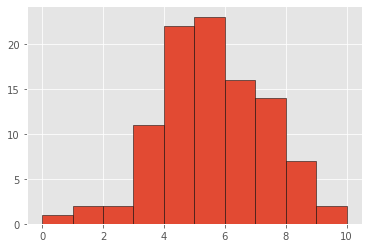

In [2]:

np.random.seed(1)describe() returns an object that holds the following descriptive statistics:

    nobs: the number of observations or elements in your dataset
    minmax: the tuple with the minimum and maximum values of your dataset
    mean: the mean of your dataset
    variance: the variance of your dataset
    skewness: the skewness of your dataset
    kurtosis: the kurtosis of your dataset
data = np.round(np.random.normal(5, 2, 100))
plt.hist(data, bins=10, range=(0,10), edgecolor='black')
plt.show()

In [61]:
# média
mean = lambda vector: sum(vector)/ len(vector)
# mediana
median = lambda vector: vector[len(sorted(vector)) // 2]
# moda
mode = lambda vector: max(set(vector), key=vector.count)
# alcanc
srange = lambda vector: max(vector) - min(vector)
# variância
variance = lambda vector: sum((i - mean(vector))**2 for i in vector) / len(vector)
# desvio padrão
std_deviation = lambda vector: variance(vector) ** .5
# erro padrão
std_error = lambda vector: std_deviation(vector) / (len(vector) ** .5)

In [33]:
print(f'media {np.mean(data)}')
print(f'mediana {np.median(data)}')
print(f'moda {stats.mode(data)}')
print(f'range {np.ptp(data)}')
print(f'variance {np.var(data)}')
print(f'desvio padrão {np.std(data)}')
print(f'erro padrão {stats.sem(data)}')

media 5.1
mediana 5.0
moda ModeResult(mode=array([5.]), count=array([23]))
range 9.0
variance 3.07
desvio padrão 1.752141546793523
erro padrão 0.1760968512214259


In [35]:
data = list(data)

print(f'media {mean(data)}')
print(f'mediana {median(data)}')
print(f'moda {mode(data)}')
print(f'range {srange(data)}')
print('variance {:.2f}'.format(variance(data)))
print(f'desvio padrao {std_deviation(data)}')
print(f'erro padrão {std_error(data)}')

media 5.1
mediana 6.0
moda 5.0
range 9.0
variance 3.07
desvio padrao 1.7521415467935229
erro padrão 0.17521415467935228


In [62]:
# média com valores não numéricos (NaN)
x = [1, np.nan, 3]

print('handcrafted: ', mean(x))
print('Numpy: ', np.nanmean(x))


# mediana com nan
print('Np: ', np.nanmedian(x))
print('handcrafted ', median(x))

handcrafted:  nan
Numpy:  2.0
Np:  2.0
handcrafted  nan


In [55]:
# weighted mean (média ponderada?)
x = [2,4, 8]
w = [0.2, 0.5, 0.3]
weighted_mean = np.average(x, weights=w)
print (weighted_mean)

# handcraft
def avg(vector, weights=None):
    if not weights:
        weights = [1 for _ in vector]
    return sum(x_i*y_i for x_i, y_i in zip(vector, weights))

print(avg(x, w))

4.8
4.8


In [63]:
# skeness
'''
skewness = 0 : normally distributed.
skewness > 0 : more weight in the left tail of the distribution.
skewness < 0 : more weight in the right tail of the distribution
'''
print(stats.skew(data, bias=False))


-0.12117666240524545


In [64]:
'''
Percentiles are used in statistics to give you a number that describes
the value that a given percent of the values are lower than.

What is the 75. percentile? The answer is 43, meaning that 75% of the people are 43 or younger.
'''

ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]
x = np.percentile(ages, 75)
print(x)

43.0


In [70]:
# Sumário descritivo
'''
describe() returns an object that holds the following descriptive statistics:

    nobs: the number of observations or elements in your dataset
    minmax: the tuple with the minimum and maximum values of your dataset
    mean: the mean of your dataset
    variance: the variance of your dataset
    skewness: the skewness of your dataset
    kurtosis: the kurtosis of your dataset
'''
print(stats.describe(data, ddof=1, bias=False))

# pandas tb, faz isso
df = pd.DataFrame(data)
df.describe()

DescribeResult(nobs=100, minmax=(0.0, 9.0), mean=5.1, variance=3.101010101010101, skewness=-0.12117666240524545, kurtosis=0.05777713724233635)


,0
count,100.000000
mean,5.100000
std,1.760969
min,0.000000
25%,4.000000
50%,5.000000
75%,6.000000
max,9.000000


data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


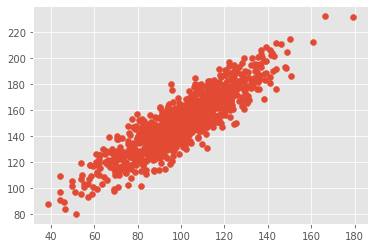

In [75]:
\# simular dados para verificar variancia e covariancia

from numpy.random import randn
from numpy.random import seed
from numpy import std

# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
plt.scatter(data1, data2)
plt.show()

In [77]:
# seed random number generator
seed(1)# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)# calculate covariance matrix
covariance = np.cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


In [83]:
# correlação de pearson
'''
We can see that the two variables are positively correlated and that the correlation is 0.8.
This suggests a high level of correlation, e.g. a value above 0.5 and close to 1.0.
'''
corr, _ = stats.pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

'''
Two variables may be related by a nonlinear relationship, such that the relationship is
stronger or weaker across the distribution of the variables.

If you are unsure of the distribution and possible relationships between two variables,
Spearman correlation coefficient is a good tool to use.
'''
corr, _ = stats.spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.888
Spearmans correlation: 0.872


# Data visualization

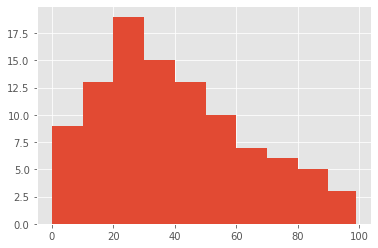

In [84]:
'''
Histograms

A histogram is an accurate representation of the distribution of numerical data.
It is an estimate of the probability distribution of a continuous variable. It is a kind of bar graph.

To construct a histogram, follow these steps −

    Bin the range of values.
    Divide the entire range of values into a series of intervals.
    Count how many values fall into each interval.

The bins are usually specified as consecutive, non-overlapping intervals of a variable.
'''
x = [1,1,2,3,3,5,7,8,9,10,
     10,11,11,13,13,15,16,17,18,18,
     18,19,20,21,21,23,24,24,25,25,
     25,25,26,26,26,27,27,27,27,27,
     29,30,30,31,33,34,34,34,35,36,
     36,37,37,38,38,39,40,41,41,42,
     43,44,45,45,46,47,48,48,49,50,
     51,52,53,54,55,55,56,57,58,60,
     61,63,64,65,66,68,70,71,72,74,
     75,77,81,83,84,87,89,90,90,91
     ]

plt.hist(x, bins=[0,10,20,30,40,50,60,70,80,90,99])
plt.show()

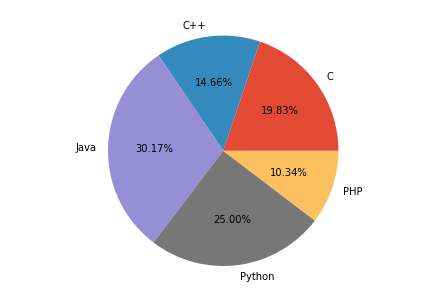

In [86]:
'''
Pie charts

A Pie Chart can only display one series of data.
Pie charts show the size of items (called wedge) in one data series, proportional to the sum of the items. The data points in a pie chart are shown as a percentage of the whole pie.
'''
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]

ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

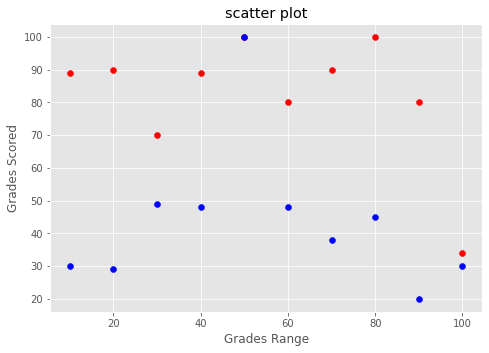

In [87]:
'''
Scatter Plot

Scatter plots are used to plot data points on horizontal and vertical axis in the attempt to show
how much one variable is affected by another.
'''
girls_grades = [89, 90, 70, 89, 100, 80, 90, 100, 80, 34]
boys_grades = [30, 29, 49, 48, 100, 48, 38, 45, 20, 30]
grades_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(grades_range, girls_grades, color='r')
ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('Grades Range')
ax.set_ylabel('Grades Scored')
ax.set_title('scatter plot')
plt.show()

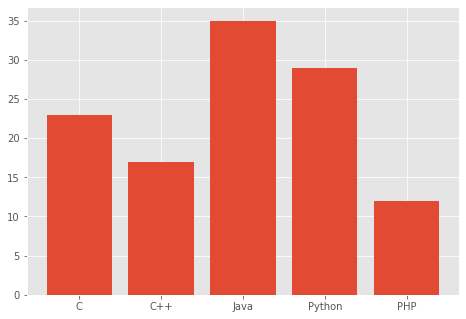

In [88]:
'''
Bar charts

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or
lengths proportional to the values that they represent.
The bars can be plotted vertically or horizontally.
'''
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.bar(langs,students)
plt.show()

# Referências

> https://medium.com/insights-school/learn-basic-statistics-with-python-cc0f45275929

> https://benalexkeen.com/basic-statistics-in-python/